In [1]:
import os, sys
from math import sqrt, isnan
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal
import scipy.fftpack
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tqdm import tnrange

In [2]:
data_path = '/home/mabon/Cross_EM/datasets/TIME/stm_em/T2/RandomDelay/og/S2_K3_150k_L00_delay_20.npz'
whole_pack = np.load(data_path)
try:
    trace_array, textin_array, key = whole_pack['power_trace'], whole_pack['plain_text'], whole_pack['key']
except Exception:
    trace_array, textin_array, key = whole_pack['trace_mat'], whole_pack['textin_mat'], whole_pack['key']
N_len=150000



In [3]:
t=[]
for i in range(N_len):
    t.append(trace_array[i][1200:2200])
trace_array=t

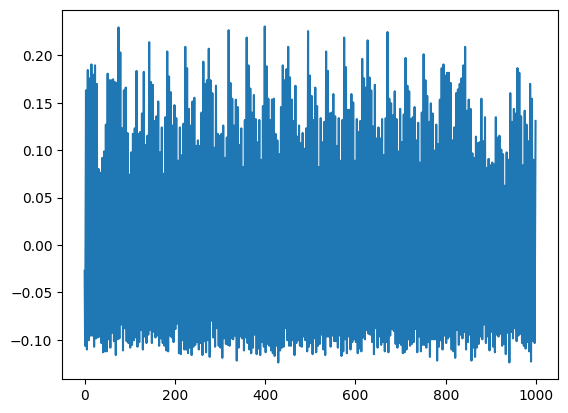

In [4]:
plt.plot(trace_array[1])

In [5]:
np.shape(trace_array)

(150000, 1000)

In [ ]:
# Perform PCA
pca = PCA(n_components=256)
pca.fit(trace_array)

# Transform the data to the principal component space
Z = pca.transform(trace_array)

In [ ]:
np.shape(Z)

In [ ]:
plt.plot(Z[44])

In [ ]:
np.savez('/home/mabon/Cross_EM/datasets/PCA_256/stm_em/T2/RandomDelay/S2_K3_150k_L00_delay_20.npz',power_trace=Z,plain_text=textin_array[0:N_len],key=key)
